# Final project 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data preparation

### Load the data from the file bikes.data. Check that the data is correctly loaded

We use the read_csv() method from the pandas library to read our text file. And while having taking a look at the first 5 lines of our dataset, it looks like the data was successfully read.

In [4]:
data = pd.read_csv('bikes.data.txt')

In [5]:
data.head()

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,season,0.00,7,TEATTERI,TEATTERI,3,0,0,0.0,0.0
1,single,0.35,7,TORI,TEATTERI,416,820,1,7.5,0.6
2,season,0.00,8,TORI,SATAMA,721,1230,0,0.0,2.1
3,single,0.25,5,TEATTERI,TORI,261,720,0,0.0,1.2
4,season,0.00,5,TEATTERI,TORI,382,710,1,3.3,0.9


### Using the data documentation, describe the properties of each variable (categorical or quantitative; scale of measurement)

| Variable | Type | Scale of measurement |
| --- | --- | --- |
ticket | categorical |
cost | quantitative | euros
month | categorical |
location_from | categorical |
location_to | categorical |
duration | quantitative | seconds
distance | quantitative | meters
assistance | categorical |
energy_used | quantitative | watt-hours
energy_collected | quantitative | watt-hours

to check if the actual data types in our dataset match the ones from our data documentation, we use the **info()** method to get a closer look

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            2000 non-null   object 
 1   cost              2000 non-null   float64
 2   month             2000 non-null   int64  
 3   location_from     2000 non-null   object 
 4   location_to       2000 non-null   object 
 5   duration          2000 non-null   int64  
 6   distance          2000 non-null   int64  
 7   assistance        2000 non-null   int64  
 8   energy_used       2000 non-null   float64
 9   energy_collected  2000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 156.4+ KB


Although we can’t see any NA values, one issue that arises is the fact that some of the categorical variables were incorrectly considered of type ‘int’, let’s change that

In [16]:
categorical_data = ['ticket','month', 'location_from', 'location_to', 'assistance']
data[categorical_data] = data[categorical_data].astype('category')

With the help of the astype() method that we apply to the subset of categorical variables, specifying the argument ‘category’, we successfully managed to correct the data types

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            2000 non-null   category
 1   cost              2000 non-null   float64 
 2   month             2000 non-null   category
 3   location_from     2000 non-null   category
 4   location_to       2000 non-null   category
 5   duration          2000 non-null   int64   
 6   distance          2000 non-null   int64   
 7   assistance        2000 non-null   category
 8   energy_used       2000 non-null   float64 
 9   energy_collected  2000 non-null   float64 
dtypes: category(5), float64(3), int64(2)
memory usage: 89.4 KB


### Calculate basic statistics for each variable.

Using the describe() method, we were able to get some basic statistics for our quantitative variables such as the total count, the mean, the standard deviation, minimum and maximum values, and the 25th, 50th (median), and 75th percentiles

In [18]:
# for quantitative variables
data.describe()

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.22345,539.975500,1721.93000,11.761300,4.389300
std,0.47570,593.810888,2017.79918,15.573439,5.990604
min,0.00000,1.000000,-3320.00000,0.000000,0.000000
25%,0.00000,144.750000,40.00000,0.000000,0.000000
50%,0.00000,400.000000,1130.00000,7.100000,2.400000
75%,0.30000,736.750000,2572.50000,18.500000,6.900000
max,6.95000,8292.000000,19740.00000,184.300000,91.500000


By default the describe() method automatically skips non-numerical variables, that’s why we had to run it a second time on the subset of categorical data

In [19]:
data[categorical_data].describe()

,ticket,month,location_from,location_to,assistance
count,2000,2000,2000,2000,2000
unique,3,7,10,10,2
top,season,6,TORI,TORI,1
freq,893,488,673,756,1633


This time, the method allowed us to get a look at the total count, the number of unique values, top value (most frequent), and the frequency of that top value.

### Visualise the distribution of each variable

Using the **subplot()** method from the **matplotlib.pyplot** library, we managed to visualize all our plots at one go, while specifying the number of rows and columns to 2 and 3 respectively (because we have 5 quantitative variables).
<br>After creating our subplots, we make use of the **distplot** function from the **seaborn** library, and with the help of a simple for loop enumerating over the quantitative columns, a distribution is visualized for each variable in its respective subplot.


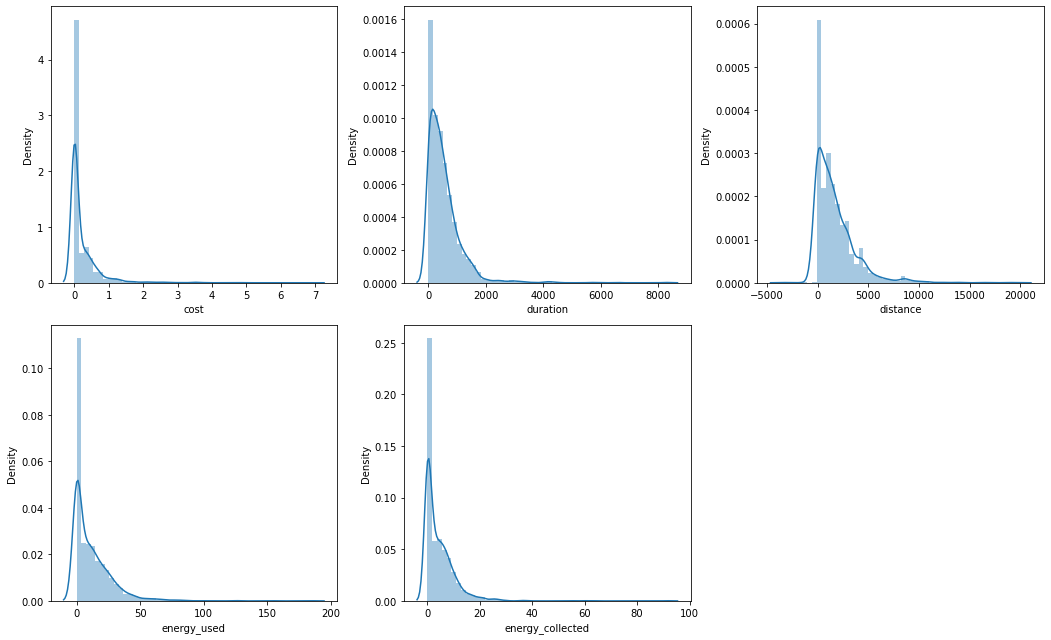

In [20]:
# Defining the number of rows and columns we would like to vizualise
n_rows=2
n_cols=3
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (14.7, 9))
# delete the unecessary last subplot
fig.delaxes(axes[1,2])

#subseting quantitative variables only
quant_data = ['cost','duration','distance','energy_used','energy_collected']

for i, column in enumerate(data[quant_data].columns):
    sns.distplot(data[column],ax=axes[i//n_cols,i%n_cols])
    plt.tight_layout()


### Visualise the counts of each variable

We can get a look at the different counts of our categorical variables using the value_counts() method

In [21]:
for column in categorical_data:
    print(data[column].value_counts())
    print('--------------------------')

season     893
single     889
savonia    218
Name: ticket, dtype: int64
--------------------------
6     488
7     406
5     380
9     256
8     230
10    197
4      43
Name: month, dtype: int64
--------------------------
TORI             673
SATAMA           321
MICROTEKNIA      202
TEATTERI         171
VÄINÖLÄNNIEMI    171
KYS              142
SNELLMANIA       110
RYPYSUO           96
UIMAHALLI         60
PETONEN           54
Name: location_from, dtype: int64
--------------------------
TORI             756
SATAMA           323
MICROTEKNIA      191
TEATTERI         165
VÄINÖLÄNNIEMI    158
SNELLMANIA       112
KYS              105
RYPYSUO           85
PETONEN           57
UIMAHALLI         48
Name: location_to, dtype: int64
--------------------------
1    1633
0     367
Name: assistance, dtype: int64
--------------------------


To get a better look at these numbers, we made use of the same method mentioned earlier with subplots, to visualize our plots in one go. This time we used the function **countplot()** from the **seaborn** library

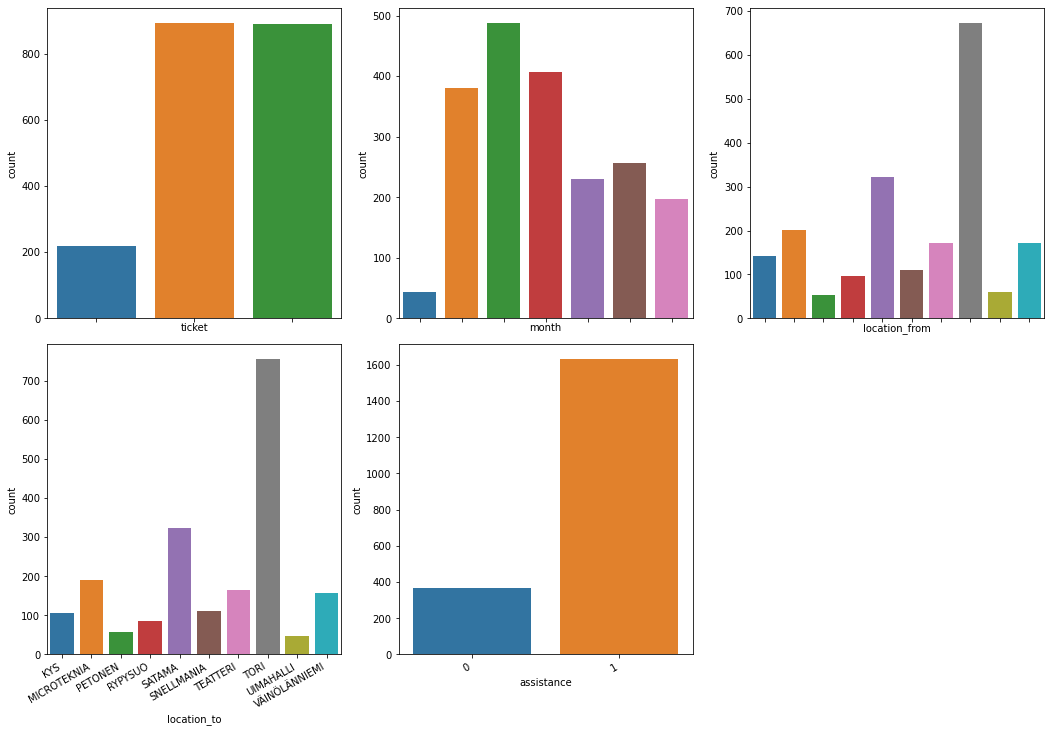

In [22]:
# Defining the number of rows and columns we would like to vizualise
n_rows=2
n_cols=3
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (14.7, 10.27))
fig.delaxes(axes[1,2])
fig.autofmt_xdate()
for i, column in enumerate(data[categorical_data].columns):
    sns.countplot(data[column],ax=axes[i//n_cols,i%n_cols])
    plt.tight_layout()

### Using the results of the previous steps, identify and process invalid values, if any

When observing the results of the basic statistics for our quantitative variables earlier, we noticed that the variable 'distance' had an oddly negative minimum value equal to -3320, a closer look to these observations would enable us to know that there are 11 instances of such.

In [23]:
data[data['distance']<0].shape[0]

11

While the number of these erroneous values is quite negligeable in comparison to our dataset, it would be possible to drop all these observations. However, since we have no specific information regarding the process of data collection, we will assume that those negative values are some kind of mistype, and that the actual correct values are the absolute values of these negative observations.

In [24]:
data['distance'] = data['distance'].apply(lambda x : x if x > 0 else abs(x))

This was possible using a lambda function that replaces every negative value from the ‘distance’ column by its absolute value 

In [25]:
data.describe()

,cost,duration,distance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.22345,539.975500,1726.960000,11.761300,4.389300
std,0.47570,593.810888,2013.493714,15.573439,5.990604
min,0.00000,1.000000,0.000000,0.000000,0.000000
25%,0.00000,144.750000,50.000000,0.000000,0.000000
50%,0.00000,400.000000,1130.000000,7.100000,2.400000
75%,0.30000,736.750000,2580.000000,18.500000,6.900000
max,6.95000,8292.000000,19740.000000,184.300000,91.500000


## Data exploration

### Calculate the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type.

Calculating the total of observations is quite straightforward using the **sum()** method on the different columns

In [26]:
# total distance travelled 
print('Total distance travelled = ' + str(data['distance'].sum()) +' meters\n')
# the total time travelled
print('Total time travelled = ' + str(data['duration'].sum()) +' seconds\n')
# the total amount of fees paid per ticket type
for ttype in data.ticket.unique():
    print('Total amount of fees paid for ' + ttype + ' tickets = ' + str(data[data['ticket']==ttype].cost.sum()) +' euros \n')

Total distance travelled = 3453920 meters

Total time travelled = 1079951 seconds

Total amount of fees paid for season tickets = 8.0 euros 

Total amount of fees paid for single tickets = 438.9 euros 

Total amount of fees paid for savonia tickets = 0.0 euros 



One unusual observation that arises from these calculations is the total amount of fees paid for season ticket and savonia tickets. 

In [27]:
df = data[data['ticket']=='season']
df[df['cost']>0]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
119,season,1.0,7,VÄINÖLÄNNIEMI,MICROTEKNIA,2232,6520,1,62.0,10.2
296,season,1.0,7,UIMAHALLI,RYPYSUO,2946,6000,1,47.8,15.9
741,season,1.0,5,TORI,TORI,2851,3920,0,0.0,9.0
785,season,1.0,8,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2286,4370,1,31.7,12.0
1091,season,1.0,6,MICROTEKNIA,PETONEN,2014,6810,0,0.0,13.5
1323,season,1.0,8,TORI,SATAMA,1856,2770,1,22.4,7.5
1469,season,1.0,6,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,2422,7110,1,36.0,9.9
1630,season,1.0,7,VÄINÖLÄNNIEMI,VÄINÖLÄNNIEMI,3268,8940,1,80.6,21.9


By having a closer look at the data, we notice that almost all the observations for trips with season ticket cost 0 euros except for 8 observations costing just 1 euro. While there is no direct explanation to this and it wouldn't be possible to drop all these observations as it will later on affect our analysis, our guess is that the type 'season' might indicate some special type of ticket gifted for customers for free.
<br>For savonia ticket the total cost adds up to zero, our assumption for this is that these tickets might indicate trips made by students from Savonia University of Applied Sciences in Kuopio, we're assuming that the electric bikes rental company had a special offer for students to get the tickets free of charge.


### Calculate the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance.

We calculated the mean following the same approach used for calculating the sum, but this time using the method **mean()**

In [28]:
# the mean distance travelled 
print('Mean distance travelled = ' + str(data['distance'].mean()) +' meters\n')
# the mean energy consumed
print('Mean energy consumed = ' + str(data['energy_used'].mean()) +' watt-hours\n')
# the mean energy collected per status of assistance
print('Mean energy collected for disabled status = ' + 
          str(data[data['assistance']==0].energy_collected.mean()) +' watt-hours\n')
print('Mean energy collected for enabled status = ' + 
          str(data[data['assistance']==1].energy_collected.mean()) +' watt-hours\n')

Mean distance travelled = 1726.96 meters

Mean energy consumed = 11.761300000000018 watt-hours

Mean energy collected for disabled status = 1.6618528610354217 watt-hours

Mean energy collected for enabled status = 5.002265768524191 watt-hours



### Find the three most popular locations per ticket type in terms of the number of trips that either started or ended at the location


In [32]:
grouped = data.groupby('ticket')
for name, group in grouped:
    print(name + '\n')
    value_counts = group.location_from.value_counts() + group.location_to.value_counts()
    print(value_counts.sort_values(ascending = False).head(3), end = '\n\n')
    print('---------------')

savonia

MICROTEKNIA    140
TORI           127
SNELLMANIA      44
dtype: int64

---------------
season

TORI             631
SATAMA           288
VÄINÖLÄNNIEMI    164
dtype: int64

---------------
single

TORI        671
SATAMA      314
TEATTERI    159
dtype: int64

---------------


By looking at the results, it looks like the location 'TORI' was quite popular for the bicycle rides, appearing in the top 3 for all ticket types. Which makes sense considering that Tori is the home for the Kuopio Market Square, which usually attracts a considerable number of visitors.

### Visualise monthly rental activity per ticket type in terms of total distance travelled

In [42]:
grouped = data.groupby(['month','ticket'])['distance'].sum().reset_index()
grouped

,month,ticket,distance
0,4,savonia,0
1,4,season,17880
2,4,single,53600
3,5,savonia,0
4,5,season,234620
5,5,single,282900
6,6,savonia,0
7,6,season,378160
8,6,single,492620
9,7,savonia,0


<AxesSubplot:xlabel='month', ylabel='distance'>

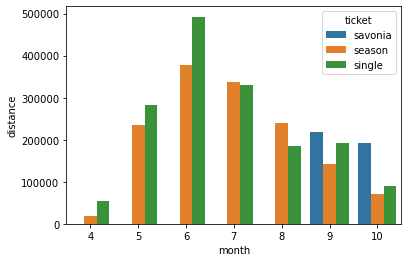

In [43]:
sns.barplot(data = grouped, y = 'distance', x = 'month', hue = 'ticket')

In terms of monthly bicycle rides, it looks like the summer months (May, June, July) are the months with the highest numbers of total distances travelled, that's mainly because people tend to do more outdoor activities during the summer. While during colder weather (September and October) the bicycle ride frequencies are much lower.
<br> Another interesting observation is in relation to the ticket types, we noticed that the savonia tickets only appear in September and October, this supports our earlier assumption about this type of ticket being a student ticket, perhaps the company offers special tickets for students specifically with the beginning of the academic year.

### Visualise the distribution of net energy gain, which is defined as the difference between the energy collected and consumed during a trip

A simple distplot() function from the seaborn library allows us the visualize the net energy gain.

<AxesSubplot:ylabel='Density'>

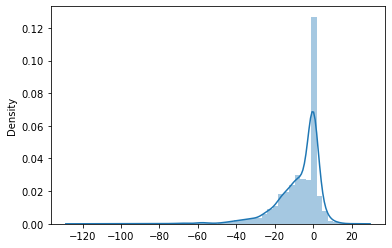

In [44]:
Net_energy = data.energy_collected - data.energy_used
sns.distplot(Net_energy)

We notice that the net energy gain is slightly skewed to the left, meaning that there are more negative values than positive ones, in terms of energy it means that in most cases the energy collected by the bikes was less than the energy consumed

### Visualise the pairwise relationships between the quantitative variables

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


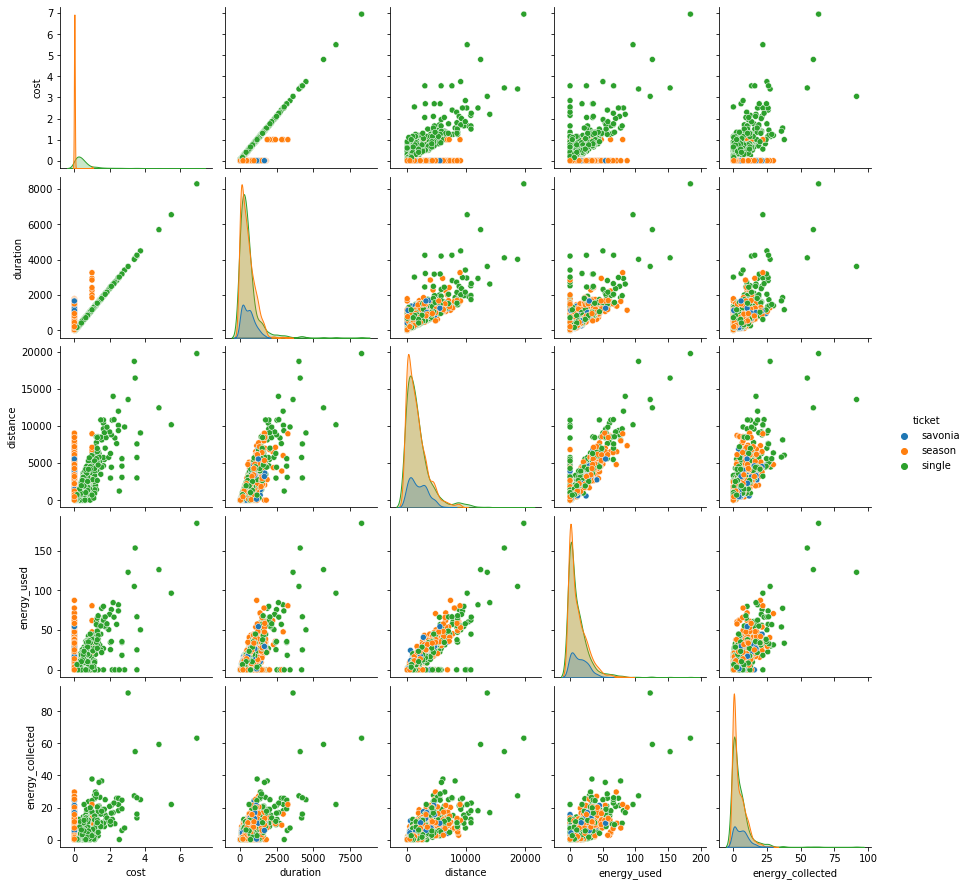

In [35]:
sns.pairplot(data, hue = 'ticket')

From this pair plot we are able to make a few observations about relationships between the variables:
-	The duration and cost variable show an almost perfect positive linear relationship, which would make sense because the longer the trip is, the more it would cost.
-	The other variables all present a strong (but not perfect) positive linear relationship, as we can notice that the data points are a lot more spread out. 
-	The variable cost shows a weird set of data points of constant value, these would be nothing but the observations where the ticket costs 0 euros (or 1 euros) that we mentioned earlier. Coloring the data points by ticket types does indeed confirm that.
-	An interesting observation that we can see from this plot, is that the same behavior of null values appears with the variable ‘energy_used’, something that we didn’t notice earlier. A simple explanation to this would be that an electric bike would operate the same as a standard one when not using the motor, whether by choice or because of a flat battery.


## Hypothesis testing

### Explain what the p-value of a statistical test means and how it can be used to make conclusions

A p-value of a statistical test represents the probability of rejecting the null hypothesis if it is true. The smaller the p-value is, the lower the probability of making an error in rejecting the null hypothesis. In often cases, we choose a limit value of 0.05. That means, we can reject the null hypothesis if the p-value is less than 0.05.

### Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type?

For this section, we introduced to functions : **test_normality(pd.DataFrame)** and **stat_diff(pvalue)**, these two functions would later on make it easier for us to interpret our results  

In [36]:
# Test normality
def test_normality(data):
    pvalue = stats.shapiro(data).pvalue
    if pvalue <= 0.05:
        print('we reject the null hypothesis, data is not normally distributed \n' + 'p-value = ' + str(pvalue))
    else:
        print('we accept the null hypothesis, data is normally distributed \n' + 'p-value = ' + str(pvalue))

In [37]:
def stat_diff(pvalue):
    if pvalue > 0.05 :
        print('the two variables are not statistically significantly different \n' + 'p-value = ' + str(pvalue))
    else :
        print('the two variables are statistically significantly different \n' + 'p-value = ' + str(pvalue))

In [38]:
single = data[data['ticket']=='single']['duration']
season = data[data['ticket']=='season']['duration']
test_normality(single)
test_normality(season)

we reject the null hypothesis, data is not normally distributed 
p-value = 1.314204962170101e-39
we reject the null hypothesis, data is not normally distributed 
p-value = 3.9606475053899425e-25


Since both our variables our numeric and not normally distributed, we used the Mann-Whitney test

In [54]:
pvalue = scipy.stats.mannwhitneyu(single,season,use_continuity=True,alternative='two-sided')[1]
stat_diff(pvalue)

the two variables are not statistically significantly different 
p-value = 0.3645632872998459


p-value is greater than 0.05, we can accept the null hypothesis that the travel times tend to be the same for the single and season ticket types. We have sufficient evidence to conclude that this difference in ticket type does not lead to statistically significant differences in travel times.

### Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?

In [40]:
single = data[data['ticket']=='single']['assistance']
savonia = data[data['ticket']=='savonia']['assistance']

In [41]:
data_cat = pd.DataFrame({'single':single, 'savonia':savonia})
data_cat_cross = pd.crosstab(data_cat.melt()['value'], data_cat.melt()['variable'])

Since we are comparing two categorical variables, there is no need to study the normality and we will be using the Pearson’s Chi-squared test

In [42]:
data_cat_cross

variable,savonia,single
value,,
0.0,9,191
1.0,209,698


In [45]:
stat, p, dof, expected = scipy.stats.chi2_contingency(data_cat_cross)
stat_diff(p)

the two variables are statistically significantly different 
p-value = 4.3404376688598015e-09


p-value is less than 0.05, we can reject the null hypothesis that the single and savonia ticket types are the same with respect to how often the electric assistance is used. We have sufficient evidence to conclude that the ticket type leads to statistically significant differences in the frequency of electrical assistance.

### Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others?

In [61]:
data.month.unique()

[7, 8, 5, 6, 9, 10, 4]
Categories (7, int64): [7, 8, 5, 6, 9, 10, 4]

In [62]:
month4 = data[data['month']==4]['distance']
month5 = data[data['month']==5]['distance']
month6 = data[data['month']==6]['distance']
month7 = data[data['month']==7]['distance']
month8 = data[data['month']==8]['distance']
month9 = data[data['month']==9]['distance']
month10 = data[data['month']==10]['distance']
test_normality(month4)
test_normality(month5)
test_normality(month6)
test_normality(month7)
test_normality(month8)
test_normality(month9)
test_normality(month10)

we reject the null hypothesis, data is not normally distributed 
p-value = 2.4531253075110726e-05
we reject the null hypothesis, data is not normally distributed 
p-value = 6.393294807371102e-24
we reject the null hypothesis, data is not normally distributed 
p-value = 1.275854054667696e-27
we reject the null hypothesis, data is not normally distributed 
p-value = 7.618503078262444e-25
we reject the null hypothesis, data is not normally distributed 
p-value = 1.3691086499646558e-14
we reject the null hypothesis, data is not normally distributed 
p-value = 4.975948980821326e-17
we reject the null hypothesis, data is not normally distributed 
p-value = 1.221518530769572e-08


Since we are analyzing multiple variables that are all not normally distributed, we will use the Kruskal-Wallis test

In [63]:
scipy.stats.kruskal(month4, month5, month6, month7, month8, month9, month10)

KruskalResult(statistic=53.384196945833914, pvalue=9.817855293535773e-10)

In [64]:
stat_diff(scipy.stats.kruskal(month4, month5, month6, month7, month8, month9, month10)[1])

the two variables are statistically significantly different 
p-value = 9.817855293535773e-10


p-value is less than 0.05, we can reject the null hypothesis that the median distance is the same through all months. We have sufficient evidence to conclude that the month of the trip leads to statistically significant differences in distances.

### Is there statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled?

In [47]:
assistance_enabled = data[data['assistance']==1]

In [48]:
test_normality(assistance_enabled['distance'])
test_normality(assistance_enabled['energy_used'])

we reject the null hypothesis, data is not normally distributed 
p-value = 2.9263315830495155e-41
we reject the null hypothesis, data is not normally distributed 
p-value = 3.7106383335321156e-42


Because the variables are not normally distributed, we will use spearman correlation

In [67]:
scipy.stats.spearmanr(assistance_enabled['distance'],assistance_enabled['energy_used'])

SpearmanrResult(correlation=0.9448061036851093, pvalue=0.0)

<AxesSubplot:>

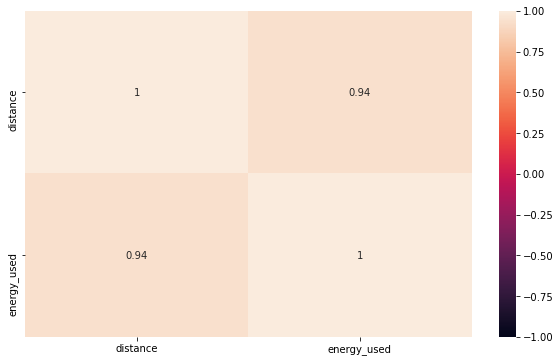

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(assistance_enabled[['distance','energy_used']].corr(method="spearman"), vmin=-1, vmax=1, annot=True)

The two variables are highly positively correlated, which makes sense because the longer the trip, the more energy the bicycle would require.

### Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?

In [68]:
subset = data[data['ticket']!= 'single']
same_location = subset[subset['location_from']==subset['location_to']]['ticket']
diff_location = subset[subset['location_from']!=subset['location_to']]['ticket']

In [69]:
data_cross = pd.DataFrame({'same location':same_location, 'different location':diff_location})
data_cross = pd.crosstab(data_cross.melt()['value'], data_cross.melt()['variable'])

In [70]:
data_cross

variable,different location,same location
value,,
savonia,142,76
season,526,367


Since we are comparing two categorical variables, there is no need to study the normality and we will be using the Pearson’s Chi-squared test

In [71]:
stat, p, dof, expected = scipy.stats.chi2_contingency(data_cross)

In [72]:
stat_diff(p)

the two variables are not statistically significantly different 
p-value = 0.10773041516811406


p-value is greater than 0.05, we can accept the null hypothesis that the savonia and season ticket types tend to be the same with respect to how often the trip ends where it started. We have sufficient evidence to conclude that this difference in trip locations does not lead to statistically significant differences in ticket types.

### Is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made?

In [50]:
data['speed']=data['distance']/data['duration']

In [51]:
test_normality(data['duration'])
test_normality(data['speed'])

we reject the null hypothesis, data is not normally distributed 
p-value = 0.0
we reject the null hypothesis, data is not normally distributed 
p-value = 6.041392237281698e-33


Because the variables are not normally distributed, we will use spearman correlation

In [76]:
scipy.stats.spearmanr(data['duration'],data['speed'])

SpearmanrResult(correlation=0.5141832155017398, pvalue=2.1094051660945863e-135)

<AxesSubplot:>

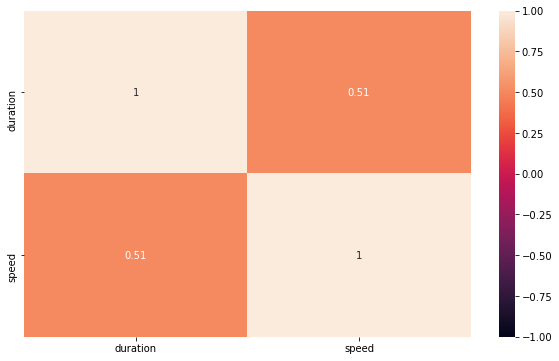

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(data[['duration','speed']].corr(method="spearman"), vmin=-1, vmax=1, annot=True)

The two variables have a moderately low correlation, which would mean that even if a person drives at a high or low speed, there would be no effect on how long the trip would be, since there is no actual starting and ending point, and the trip ends when the user has reached their desired destination.